**Quick Start**

Source: https://nixtlaverse.nixtla.io/mlforecast/docs/getting-started/quick_start_local.html

- Dataset preprocessato: fcst.preprocess(df)
- Dataset di training e test finale: X, y = fcst.preprocess(df, return_X_y=True, as_numpy=True)
- Le trasformazioni di MLForecast vengono effettuati anche sulle esogene: no, sono distinte
- Nel predict non considera le feature della target? Nel recursive può sempre calcolarsele perché ha i valori predetti
- Nel predict se ho delle features calcolate con dei regressori, come le calcola? Come ha fatto nel training
- Processo a backend? Non è ben descritto
- Mettere tutte le serie insieme: calcolo delle features e del modello
- Forecasting con i regressori

In [4]:
import pandas as pd
from utilsforecast.plotting import plot_series
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()

# unique_id: identifier of time serie

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [11]:
fcst = MLForecast(
    models=LinearRegression(),
    freq='MS',  # our serie has a monthly frequency
    lags=[12], # begono calcolati sulla target originale
    target_transforms=[Differences([1])], # nuova target non considerata nei lags 
)
fcst

MLForecast(models=[LinearRegression], freq=MS, lag_features=['lag12'], date_features=[], num_threads=1)

In [13]:
X, y = fcst.preprocess(df, return_X_y=True, as_numpy=True)

In [18]:
X, y

(array([[   6.],
        [  14.],
        [  -3.],
        [  -8.],
        [  14.],
        [  13.],
        [   0.],
        [ -12.],
        [ -17.],
        [ -15.],
        [  14.],
        [  -3.],
        [  11.],
        [  15.],
        [  -6.],
        [ -10.],
        [  24.],
        [  21.],
        [   0.],
        [ -12.],
        [ -25.],
        [ -19.],
        [  26.],
        [   5.],
        [   5.],
        [  28.],
        [ -15.],
        [   9.],
        [   6.],
        [  21.],
        [   0.],
        [ -15.],
        [ -22.],
        [ -16.],
        [  20.],
        [   5.],
        [   9.],
        [  13.],
        [ -12.],
        [   2.],
        [  35.],
        [  12.],
        [  12.],
        [ -33.],
        [ -18.],
        [ -19.],
        [  22.],
        [   2.],
        [   0.],
        [  40.],
        [  -1.],
        [  -6.],
        [  14.],
        [  21.],
        [   8.],
        [ -35.],
        [ -26.],
        [ -31.],
        [  21.

In [15]:
fcst.ts.features_order_

['lag12']

In [16]:
fcst.fit(df)

MLForecast(models=[LinearRegression], freq=MS, lag_features=['lag12'], date_features=[], num_threads=1)

In [17]:
# nella parte ricorsiva, il dataset sarà strutturato come quello di train. 
# quindi ogni y (che sarà la differenza) sarà predetta dal lag a 12 ed infien trasformata 
preds = fcst.predict(12)
preds

,unique_id,ds,LinearRegression
0,AirPassengers,1961-01-01,444.656555
1,AirPassengers,1961-02-01,417.470734
2,AirPassengers,1961-03-01,446.903046
3,AirPassengers,1961-04-01,491.014130
4,AirPassengers,1961-05-01,502.622223
5,AirPassengers,1961-06-01,568.751465
6,AirPassengers,1961-07-01,660.044312
7,AirPassengers,1961-08-01,643.343323
8,AirPassengers,1961-09-01,540.666687
9,AirPassengers,1961-10-01,491.462708


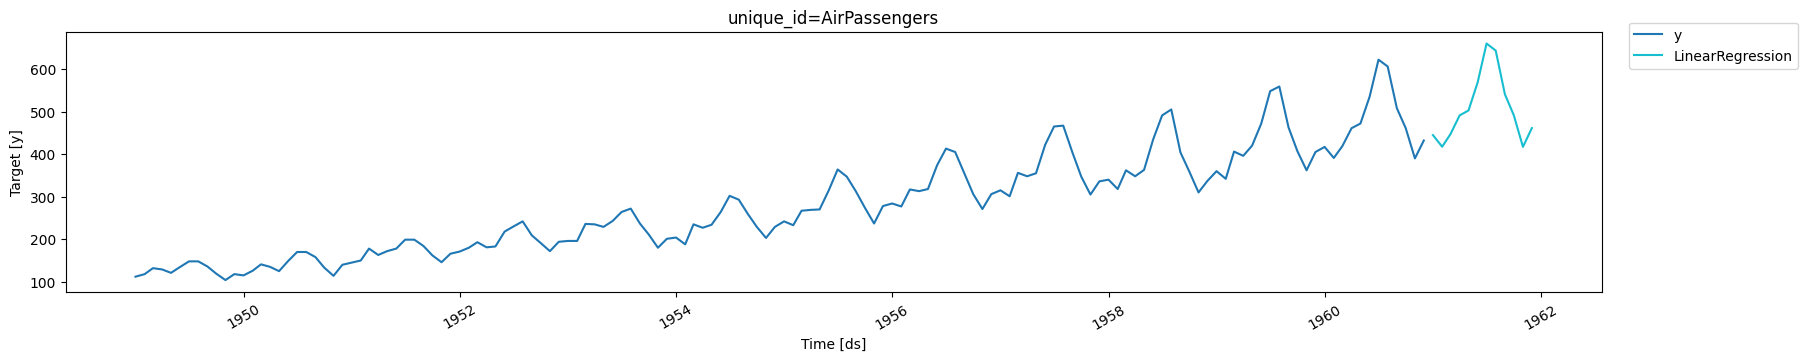

In [92]:
fig = plot_series(df, preds)
fig